In [1]:
import pandas as pd 
import shap 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Carregar e visualizar os Dados - Regressão

In [2]:
# Carregar dados
df = pd.read_csv('.\datasets\colesterol.csv')

In [3]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
# Visualizar df
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [5]:
# Ajustar DF 
df.drop('Id', axis=1, inplace=True)

# Aplicar OneHotEncoding nas variáveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo','Fumante','Nível de Atividade'])

In [6]:
df.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,0,0,1,0,0,1,0,1,0
1,68,105.0,184,236.98,1,0,0,0,1,0,0,0,1
2,25,64.8,180,161.79,0,0,0,1,1,0,1,0,0
3,43,120.2,167,336.24,1,0,0,0,1,0,1,0,0
4,79,88.5,175,226.23,0,1,0,0,1,0,0,1,0
5,68,66.8,170,185.31,0,0,1,0,1,0,0,1,0
6,60,117.3,181,289.33,1,0,0,0,0,1,0,1,0
7,35,86.9,174,216.48,0,0,0,1,0,1,0,0,1
8,62,81.3,166,235.30,0,0,0,1,1,0,0,1,0
9,44,32.7,165,97.79,0,0,1,0,0,1,1,0,0


### Treinar modelo de regressão Linear

In [7]:
X = df.drop(columns=['Colesterol'], axis=1)
y = df.Colesterol

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [9]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Apresentar Plots Shapley Values - Regressão

In [10]:
# Rodar explainer no conj de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [11]:
# Calcular Shapley values no conjunto de testes
shap_values_reg = explainer_reg(X_test)

PermutationExplainer explainer: 301it [00:27, 11.02it/s]                         


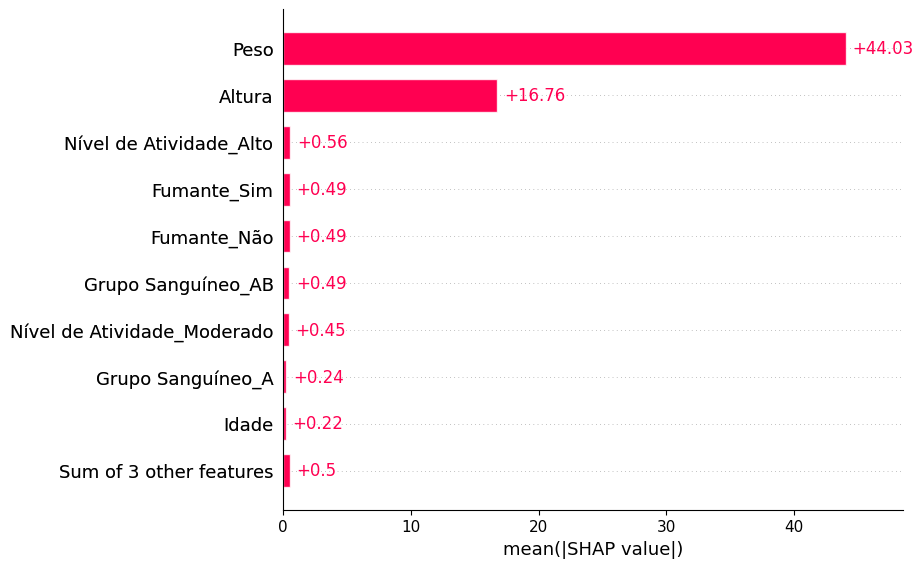

In [12]:
# Plotar a contribuição geral por shapley values
shap.plots.bar(shap_values_reg)

In [13]:
# Mostrar 1a intância do conjunto de testes
X_test.iloc[0,:]

Idade                           29.0
Peso                            87.8
Altura                         179.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 833, dtype: float64

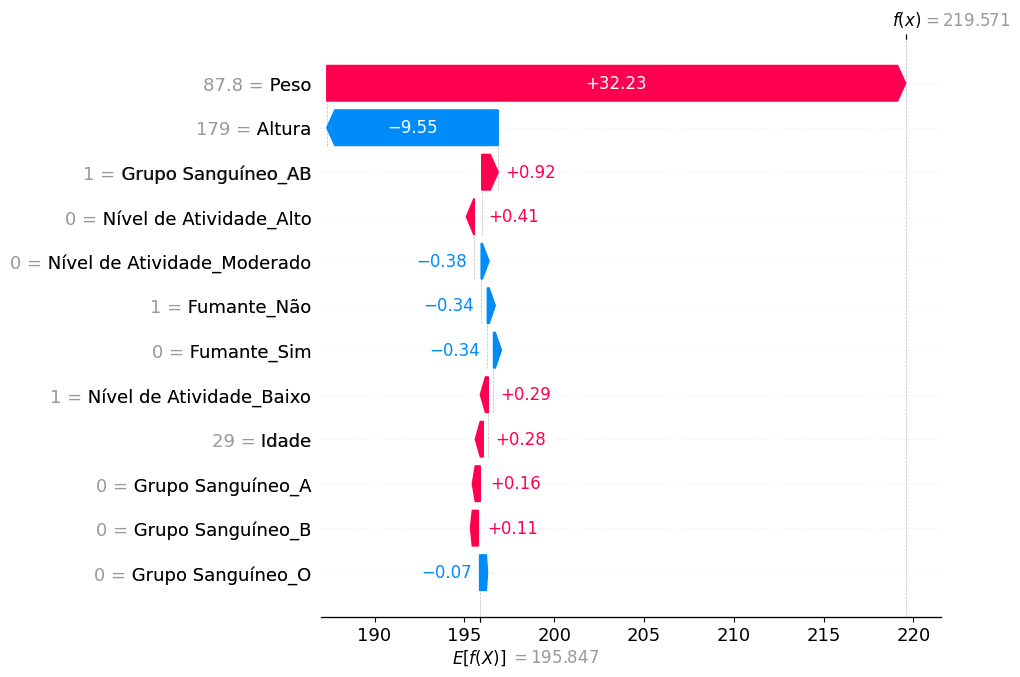

In [14]:
# Plotar o shapley values para um exemplo especifico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

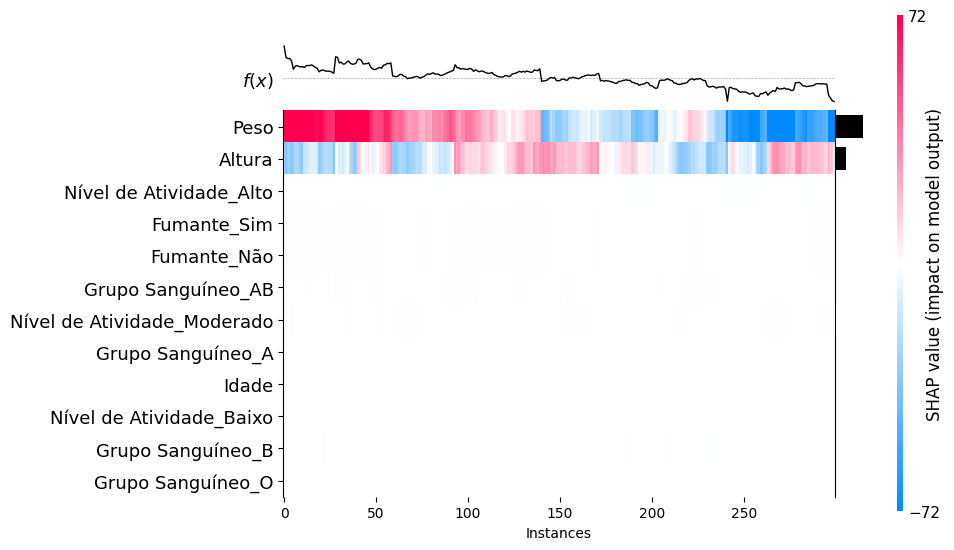

<Axes: xlabel='Instances'>

In [15]:
# Plotar heatmap geral
shap.plots.heatmap(shap_values_reg, max_display=13)

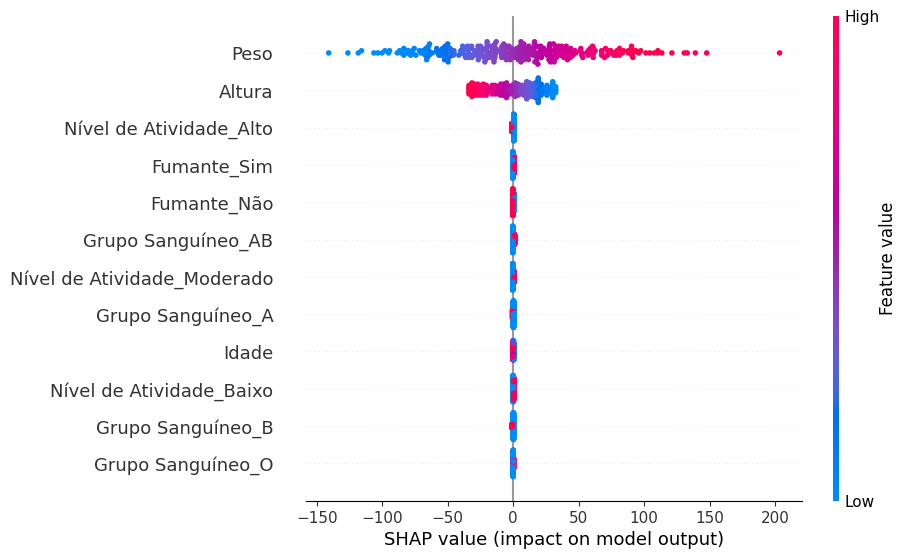

In [16]:
# Plot de Beewswarm Geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

## Carregar e Preparar Dados - Classificação

In [41]:
df2 = pd.read_csv(r'.\datasets\fruit_quality.csv')

In [42]:
df2.Quality = (df2.Quality=='good').astype(int)

In [43]:
# Ajustar DF
df2.drop(columns=['A_id'], axis=1, inplace=True)

In [44]:
X = df2.drop(columns=['Quality'], axis=1)
y = df2['Quality']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

### Treinar modelo de Regressão Logistica

In [46]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Apresentar Plots Shapley Values - Classificação

In [47]:
# Rodar explainer no conj de treinamento
explainer_class = shap.Explainer(model_lr.predict, X_train)

In [48]:
# Calcular Shapley values no conjunto de testes
shap_values_class = explainer_class(X_test)

ExactExplainer explainer: 1201it [00:16, 21.30it/s]                           


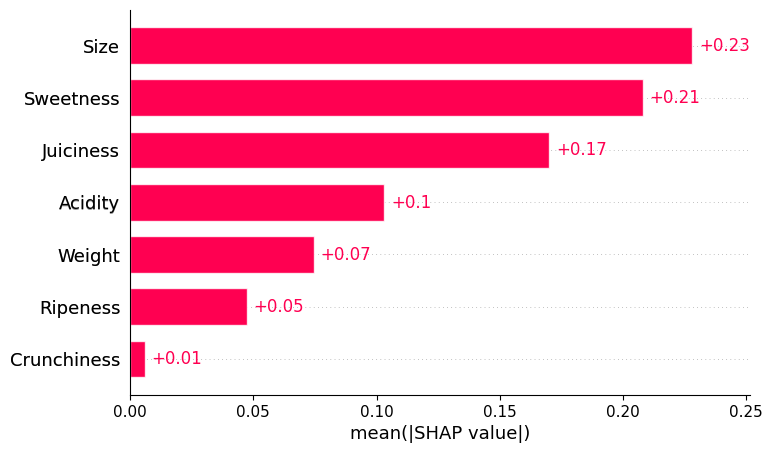

In [49]:
# Plotar a contribuição geral por shapley values
shap.plots.bar(shap_values_class)

In [50]:
# Mostrar 1a intância do conjunto de testes
X_test.iloc[0,:]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

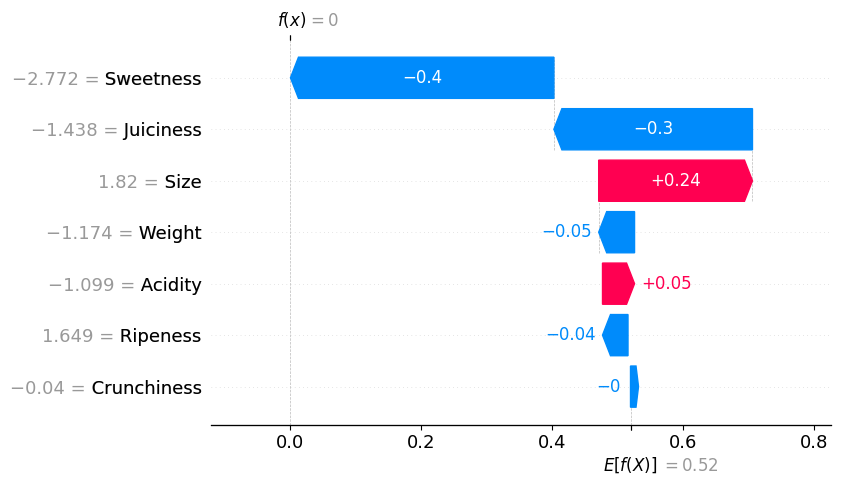

In [51]:
# Plotar o shapley values para um exemplo especifico
shap.plots.waterfall(shap_values_class[0], max_display=13)

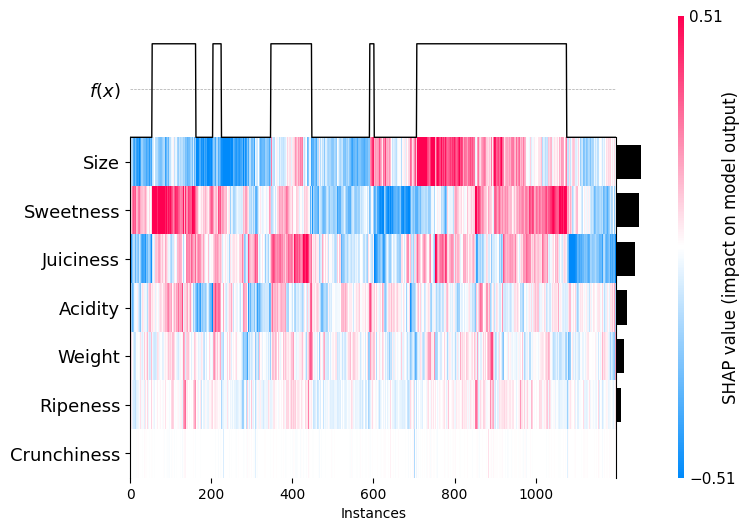

<Axes: xlabel='Instances'>

In [52]:
# Plotar heatmap geral
shap.plots.heatmap(shap_values_class, max_display=13)

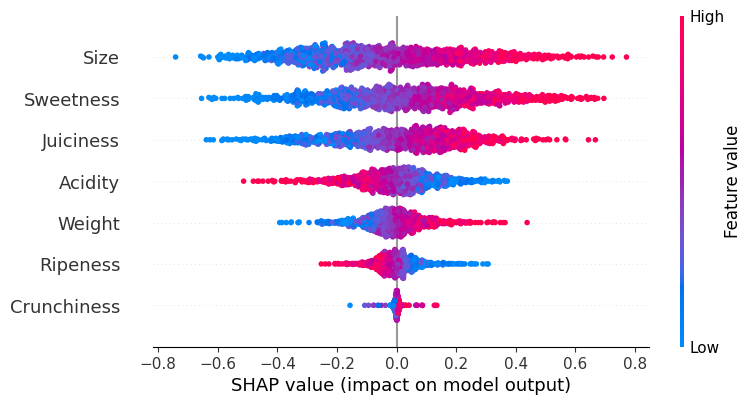

In [53]:
# Plot de Beewswarm Geral
shap.plots.beeswarm(shap_values_class, max_display=13)